In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import trim_mean

In [78]:
df = pd.read_csv('state.csv')
print(df.head(),'\n')
print(df.tail(),'\n')
print(df.describe())

   YEAR STATE  RATE DEATHS                                       URL
0  2022    AL  14.9    706     /nchs/pressroom/states/alabama/al.htm
1  2022    AK  10.2     76      /nchs/pressroom/states/alaska/ak.htm
2  2022    AZ   9.0    629     /nchs/pressroom/states/arizona/az.htm
3  2022    AR  11.8    345    /nchs/pressroom/states/arkansas/ar.htm
4  2022    CA   5.9  2,304  /nchs/pressroom/states/california/ca.htm 

     YEAR STATE  RATE DEATHS  \
496  2005    VA   6.4    490   
497  2005    WA   3.6    231   
498  2005    WV   5.4     93   
499  2005    WI   4.3    236   
500  2005    WY   NaN     16   

                                                   URL  
496       /nchs/pressroom/states/virginia/virginia.htm  
497   /nchs/pressroom/states/washington/washington.htm  
498  /nchs/pressroom/states/westvirginia/westvirgin...  
499     /nchs/pressroom/states/wisconsin/wisconsin.htm  
500         /nchs/pressroom/states/wyoming/wyoming.htm   

              YEAR        RATE
count   501.0000

In [79]:
df.drop(columns=['DEATHS','URL'],inplace=True)

In [80]:
df1 = df[df['YEAR'] == 2022]

In [81]:
df1.head()

,YEAR,STATE,RATE
0,2022,AL,14.9
1,2022,AK,10.2
2,2022,AZ,9.0
3,2022,AR,11.8
4,2022,CA,5.9


In [82]:
for data in df['STATE']:
    if data == 'District of Columbia':
        df1.loc[df['STATE']=='District of Columbia','STATE'] = 'DC'

In [87]:
df1

,YEAR,STATE,RATE
0,2022,AL,14.9
1,2022,AK,10.2
2,2022,AZ,9.0
3,2022,AR,11.8
4,2022,CA,5.9
5,2022,CO,7.2
6,2022,CT,4.3
7,2022,DE,7.0
8,2022,DC,23.7
9,2022,FL,7.2


In [93]:
df=df1.dropna()

In [96]:
MurderRate_mean = df['RATE'].mean()
MurderRate_std = df['RATE'].std()
MurderRate_q1 = df['RATE'].quantile(0.25)
MurderRate_q3 = df['RATE'].quantile(0.75)
MurderRate_median = df['RATE'].median()
print(MurderRate_mean,
MurderRate_std,
MurderRate_q1,
MurderRate_q3,
MurderRate_median)

7.930612244897959 4.843733240041225 4.3 10.2 7.2


In [101]:
df = df[(df['RATE']>=MurderRate_q1) & (df['RATE']<=MurderRate_q3)]
df.count()

YEAR     25
STATE    25
RATE     25
dtype: int64

Text(0.5, 1.0, 'STATE and MURDER RATES')

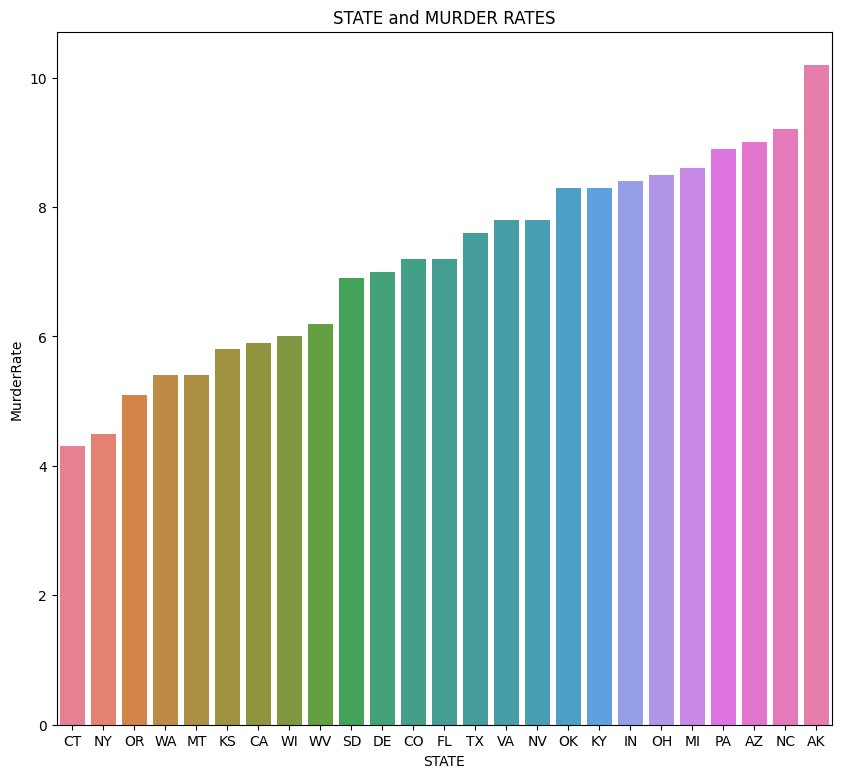

In [125]:
fig,ax1 = plt.subplots()
fig.set_size_inches(10,9)
ax1 = sns.barplot(x='STATE',y='RATE',data=df.sort_values('RATE'),hue='STATE',legend=False)
ax1.set(xlabel='STATE',ylabel='MurderRate')
ax1.set_title('STATE and MURDER RATES')

EDA ON THE IRIS DATASET

In [140]:
data = pd.read_csv('Iris.csv')
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [141]:
data.drop(columns=['Id'],inplace=True)

In [142]:
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [143]:
data.shape

(150, 5)

In [132]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [144]:
data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [145]:
data.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [149]:
data['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

<Axes: xlabel='Species', ylabel='count'>

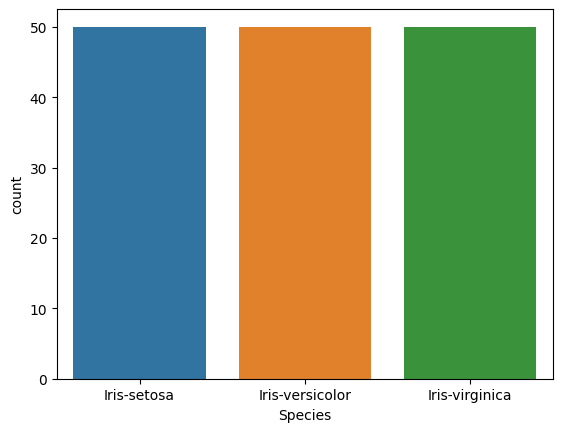

In [151]:
sns.countplot(x='Species',data=data,hue='Species')

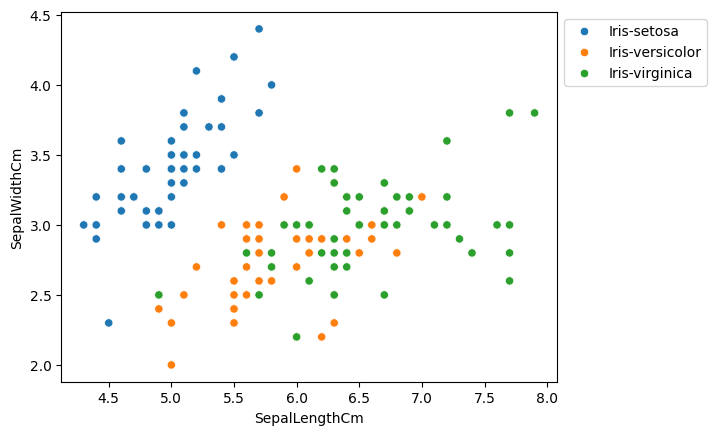

In [154]:
sns.scatterplot(x='SepalLengthCm',y='SepalWidthCm',hue='Species',data=data)
plt.legend(bbox_to_anchor=(1, 1), loc=2)

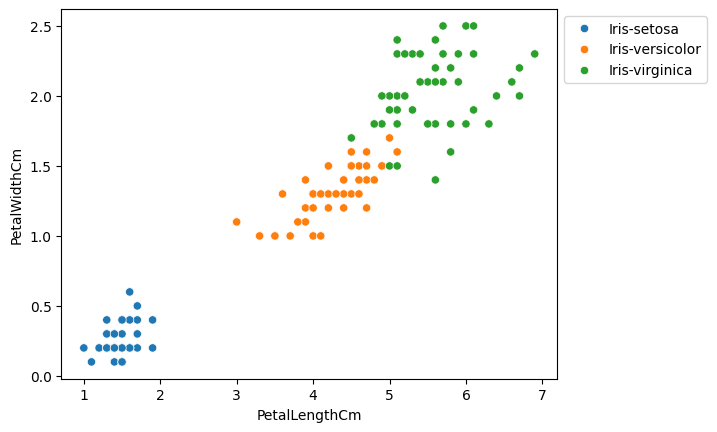

In [156]:
sns.scatterplot(x='PetalLengthCm',y='PetalWidthCm',hue='Species',data=data)
plt.legend(bbox_to_anchor=(1,1),loc=2)

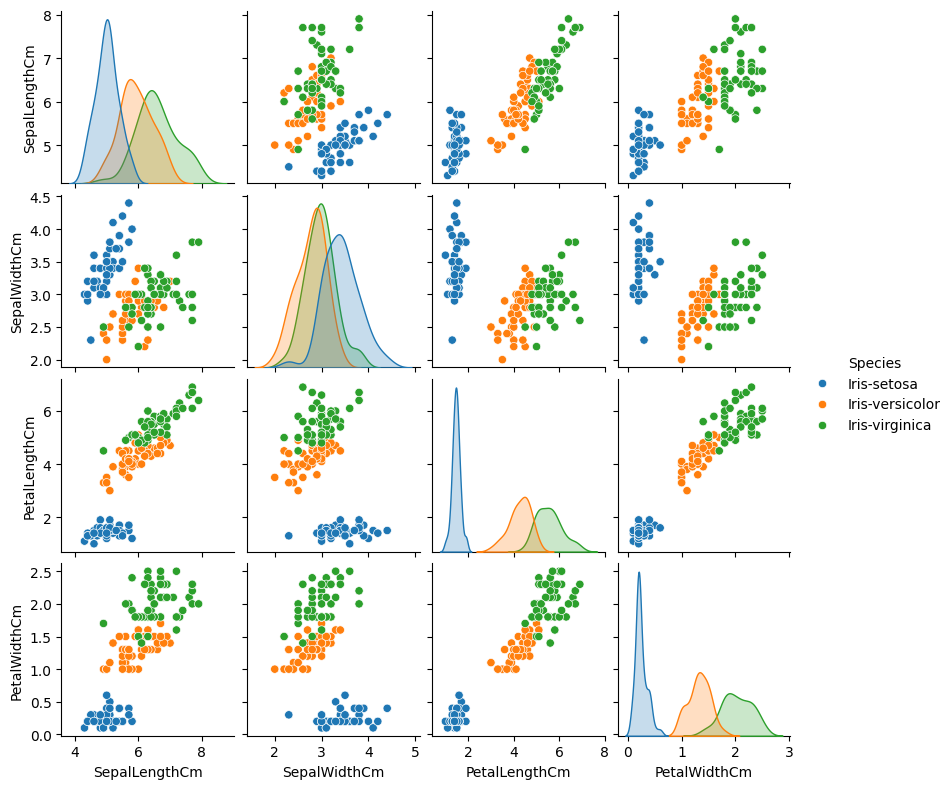

In [162]:
sns.pairplot(data,hue='Species', height=2)

(array([49.,  8., 41., 29., 23.]),
 array([0.1 , 0.58, 1.06, 1.54, 2.02, 2.5 ]),
 <BarContainer object of 5 artists>)

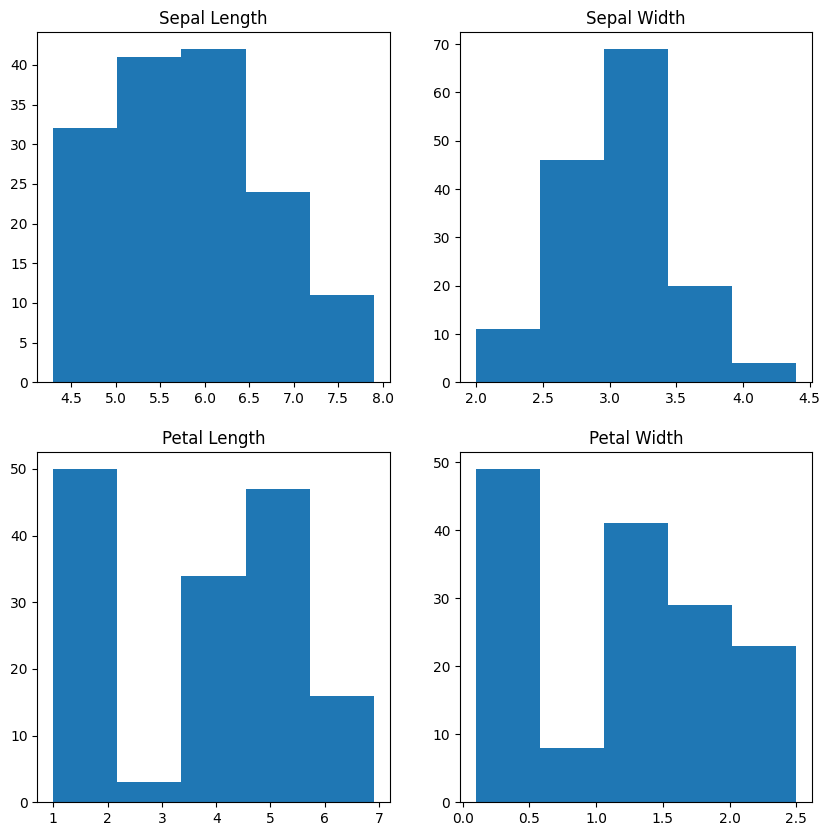

In [167]:
fig, axes = plt.subplots(2, 2, figsize=(10,10))

axes[0,0].set_title("Sepal Length")
axes[0,0].hist(data['SepalLengthCm'], bins=5)

axes[0,1].set_title("Sepal Width")
axes[0,1].hist(data['SepalWidthCm'], bins=5)

axes[1,0].set_title("Petal Length")
axes[1,0].hist(data['PetalLengthCm'], bins=5)

axes[1,1].set_title("Petal Width")
axes[1,1].hist(data['PetalWidthCm'], bins=5)

In [168]:
df= data

In [180]:
a = data.select_dtypes(include=['number']).corr(method='pearson')

<Axes: >

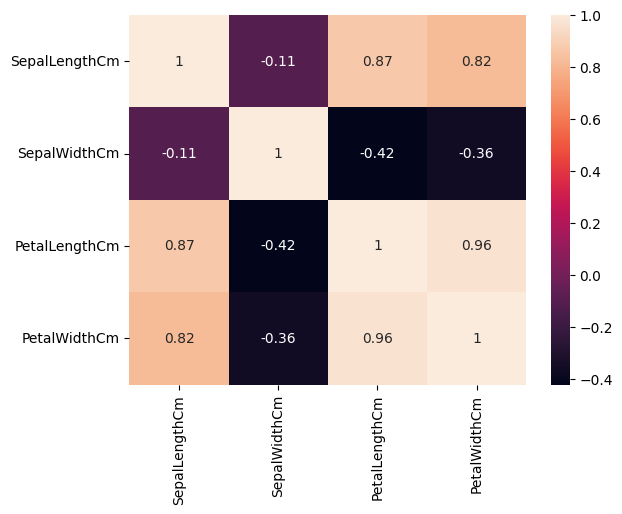

In [182]:
sns.heatmap(a,annot=True)

<Axes: xlabel='Species', ylabel='PetalWidthCm'>

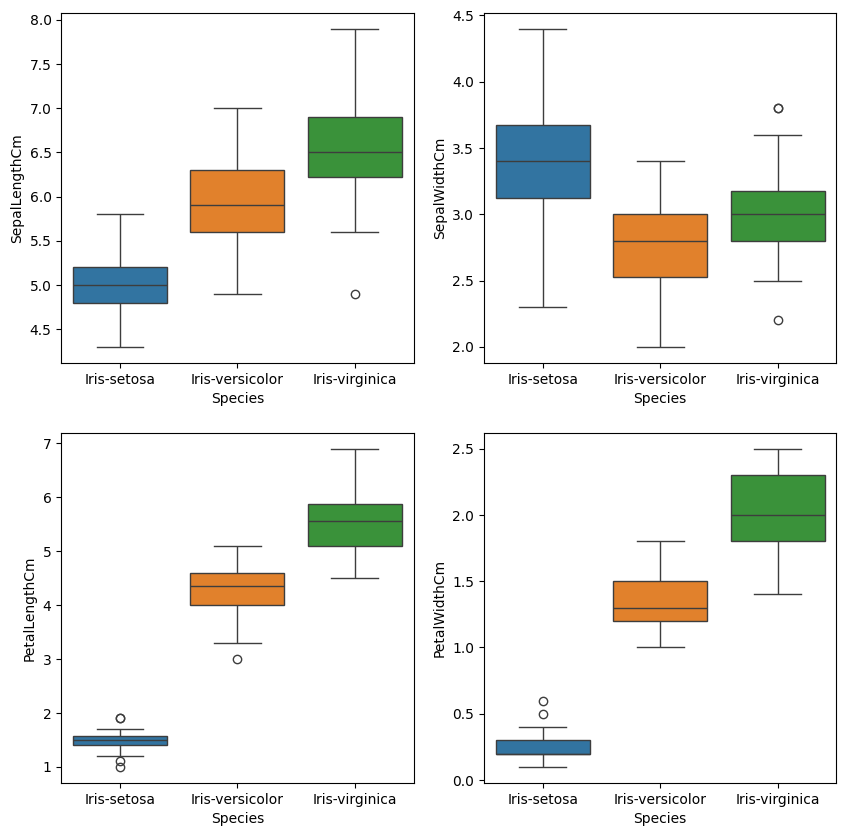

In [187]:
plt.figure(figsize=(10,10))
plt.subplot(221)
sns.boxplot(x='Species',y='SepalLengthCm',data=df,hue='Species')
plt.subplot(222)
sns.boxplot(x='Species',y='SepalWidthCm',data=df,hue='Species')
plt.subplot(223)
sns.boxplot(x='Species',y='PetalLengthCm',data=df,hue='Species')
plt.subplot(224)
sns.boxplot(x='Species',y='PetalWidthCm',data=df,hue='Species')

EDA on TITANIC Dataset

In [188]:
titanic = pd.read_csv('titanic.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [189]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: xlabel='Sex', ylabel='count'>

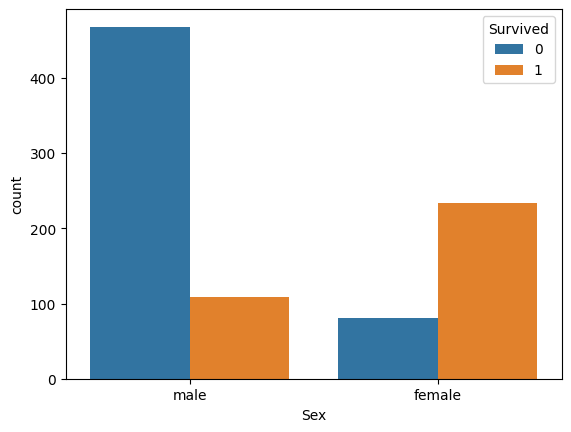

In [190]:
sns.countplot(x='Sex',hue='Survived',data=titanic)

<Axes: xlabel='Survived', ylabel='Pclass'>

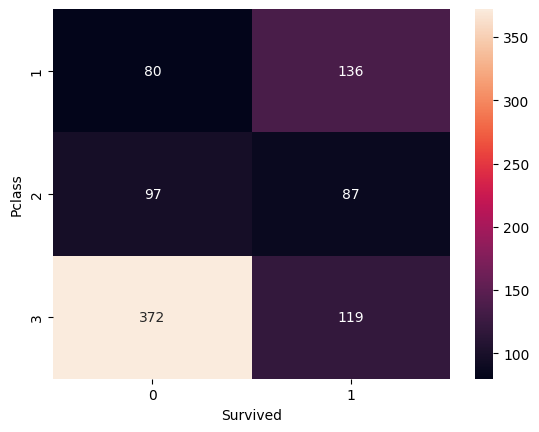

In [207]:
group = titanic.groupby(['Pclass','Survived'])
pclass_survived = group.size().unstack()
sns.heatmap(pclass_survived,annot=True,fmt='d')

<Axes: xlabel='Sex', ylabel='Age'>

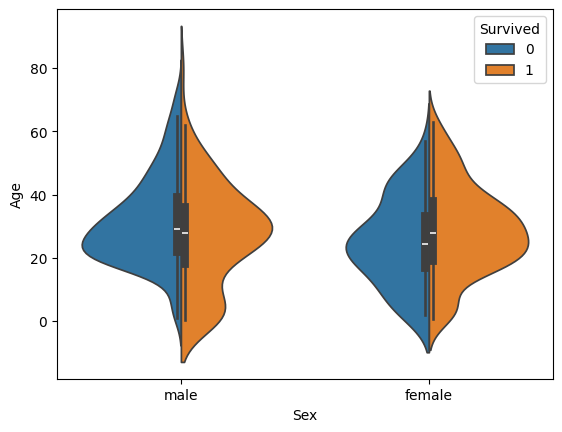

In [209]:
sns.violinplot(x='Sex',y='Age',hue='Survived',data = titanic,split=True)

In [218]:
titanic['Familysize'] = 0
titanic['Familysize'] = titanic['Parch']+titanic['SibSp']

titanic['Alone'] = 0
titanic.loc[titanic.Familysize == 0,'Alone'] = 1

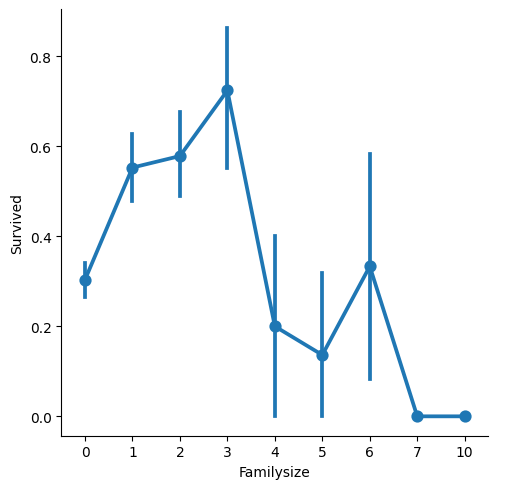

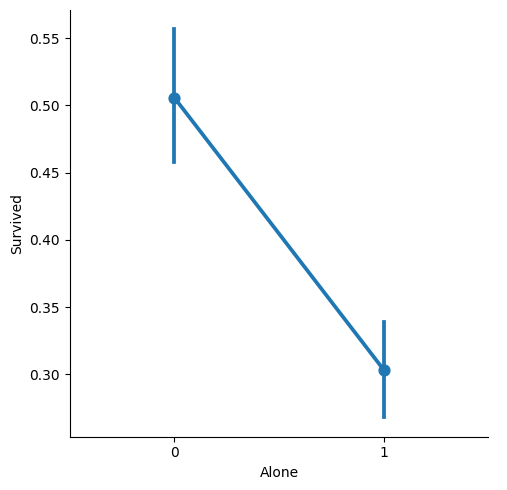

In [228]:
sns.catplot(x ='Familysize', y ='Survived', data = titanic,kind='point') 
sns.catplot(x ='Alone', y ='Survived', data = titanic,kind='point') 

<Axes: xlabel='Fare_Range', ylabel='Survived'>

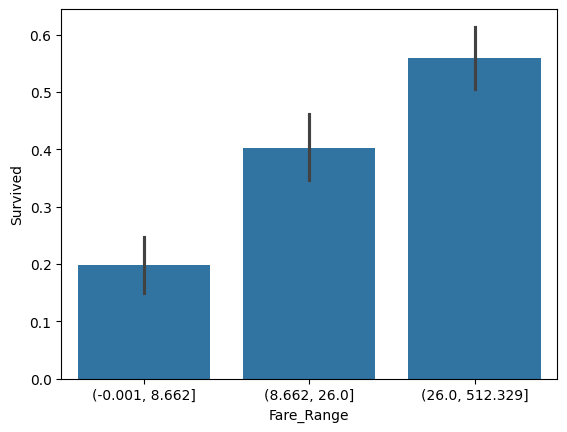

In [233]:
titanic['Fare_Range'] = pd.qcut(titanic['Fare'], 3)
sns.barplot(x ='Fare_Range', y ='Survived',  
data = titanic)

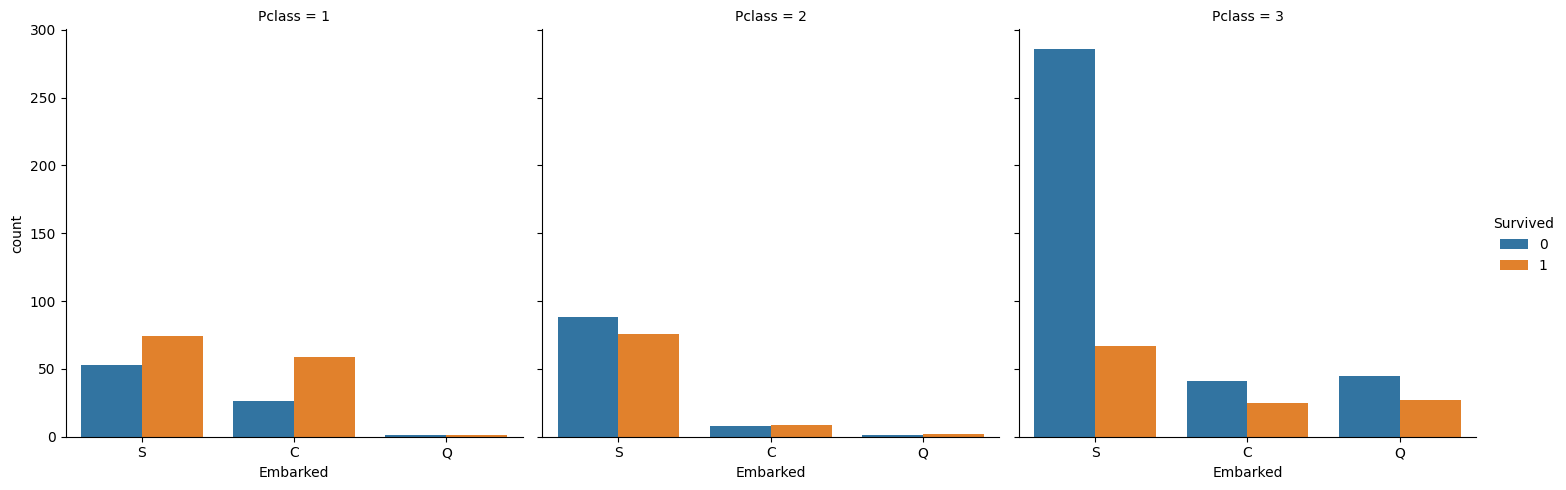

In [234]:
sns.catplot(x ='Embarked', hue ='Survived',  
kind ='count', col ='Pclass', data = titanic) 